## Task 1.1

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tabulate import tabulate

In [ ]:

def load_data(filename):
    # using function to read in the csv file 
    my_list = []
    with open(filename, 'r', encoding='utf-8') as h:
        for i, line in enumerate(h):
            if i == 0: #removing the header from the original csv file 
                continue
            row = line.strip().split(',')
            my_list.append(row)
    return my_list

data = load_data("Booli_sold.csv")

def calculate_price_per_square(all_data):
    results = []
    # using a for statement to iterate all the values in CSV and adding them to a list
    for row in all_data:
            try:
                list_price = float(row[0])
                square_meters = float(row[2])
                sold_price = float(row[9])

                if square_meters > 0:
                    price_per_sqm = sold_price / square_meters
                else:
                    price_per_sqm = None  # Invalid data, no calculation
                
                # Append the result to the list for the current dataset
                results.append({
                    "List price": list_price,
                    "Square meters": square_meters,
                    "Sold price": sold_price,
                    "Price per square meters": price_per_sqm
                })

            except (ValueError, IndexError):
                # Handle cases where data is missing or invalid such as NA values 
                results.append({
                    "List price": None,
                    "Square meters": None,
                    "Sold price": None,
                    "Price per square meters": None
                })
        # Add the results of the current list to the overall results
    return results

results = calculate_price_per_square(data)

header = results[0].keys()

# Prepare the rows (values of the dictionaries)
rows = [list(entry.values()) for entry in results]

# Print the table using tabulate
print(tabulate(rows, headers=header, tablefmt="fancy grid"))

  List price    Square meters    Sold price    Price per square meters
------------  ---------------  ------------  -------------------------
   3.995e+06             73       3.82e+06                     52328.8
   1.995e+06             36       2.355e+06                    65416.7
   5.1e+06               81       6.11e+06                     75432.1
   5.495e+06            107       8.05e+06                     75233.6
   1.995e+06             29       2.4e+06                      82758.6
   7.495e+06            125       8.95e+06                     71600
   3.975e+06             79.2     4.2e+06                      53030.3
   3.25e+06              64.3     3.3e+06                      51321.9
   3.25e+06              64.3     3.15e+06                     48989.1
   5.495e+06             96       5.4e+06                      56250
   2.295e+06             29       2.42e+06                     83448.3
   2.495e+06             47       3.26e+06                     69361.7
   4.75e+0

### Task 1.2

In [ ]:
def most_expensive_apartment(data, top_n = 5):
    results = calculate_price_per_square(data)
    # using keys to accses relevant data for the task
    valid_results = [entry for entry in results if entry ['Price per square meters'] is not None]

    sorted_results = sorted(valid_results, key=lambda x: x['Price per square meters'], reverse= True)

    return sorted_results[:top_n]

top_apartments = most_expensive_apartment(data, top_n=5)

def header_for_apartments(top_apartments):
    header = ['List Price', 'Square Meters', 'Sold Price', 'Price per Square Meters'] # Making a custom header for a table 
    apartments_as_lists = [
        [apartment['List price'], apartment['Square meters'], apartment['Sold price'], apartment['Price per square meters']]
        for apartment in top_apartments # appending the values to the table 
    ]
    return [header] + apartments_as_lists


header = ['List Price', 'Square Meters', 'Sold Price', 'Price per Square Meters']

# Convert dictionary results into rows for the table with custom haeders 
rows = [
    [apartment['List price'], apartment['Square meters'], apartment['Sold price'], apartment['Price per square meters']]
    for apartment in top_apartments
]
print(tabulate(rows, headers=header, tablefmt="grid"))

+--------------+-----------------+--------------+---------------------------+
|   List Price |   Square Meters |   Sold Price |   Price per Square Meters |
+==============+=================+==============+===========================+
|    1.595e+06 |            24   |     2.5e+06  |                  104167   |
+--------------+-----------------+--------------+---------------------------+
|    1.89e+06  |            24   |     2.45e+06 |                  102083   |
+--------------+-----------------+--------------+---------------------------+
|    1.795e+06 |            23   |     2.3e+06  |                  100000   |
+--------------+-----------------+--------------+---------------------------+
|    1.75e+06  |            25   |     2.21e+06 |                   88400   |
+--------------+-----------------+--------------+---------------------------+
|    1.895e+06 |            26.9 |     2.3e+06  |                   85501.9 |
+--------------+-----------------+--------------+---------------

### Task 1.3

In [ ]:
def extract_ekhagsvagen_data(all_data):
    ekhagsvagen_data = []
    
    # making a for statement so that we can iterate
    for row in all_data:
        # Extract the address of interest
        if len(row) > 16:
            address = row[16].strip()  

            # Check if the address contains 'Ekhagsvägen'
            if 'Ekhagsvägen' in address:
                ekhagsvagen_data.append(row)  # Add the row to the list
    return ekhagsvagen_data


def calculate_avg_ppsqm(data):
    total_ppsqm = 0
    count = 0
    #Adding every relevant cell from df to variable 
    for row in data:
        try:
            list_price = float(row[0])  
            square_meters = float(row[2])  
            sold_price = float(row[9])  

            if square_meters > 0:  
                price_per_sqm = sold_price / square_meters
                total_ppsqm += price_per_sqm
                count += 1
        except (ValueError, IndexError):
            continue  # Skip rows with invalid data such as NA values 
    # The same here for invalid data
    if count > 0:
        avg_ppsqm = total_ppsqm / count
    else:
        avg_ppsqm = None  
    
    return avg_ppsqm

ekhagsvagen_data = extract_ekhagsvagen_data(all_data=data)
avg_ppsqm_ekhagen = calculate_avg_ppsqm(ekhagsvagen_data)
print(f'The avereage ppsqm in Ekhagen is: {avg_ppsqm_ekhagen}')

The avereage ppsqm in Ekhagen is: 60636.48126542503


### Task 1.4

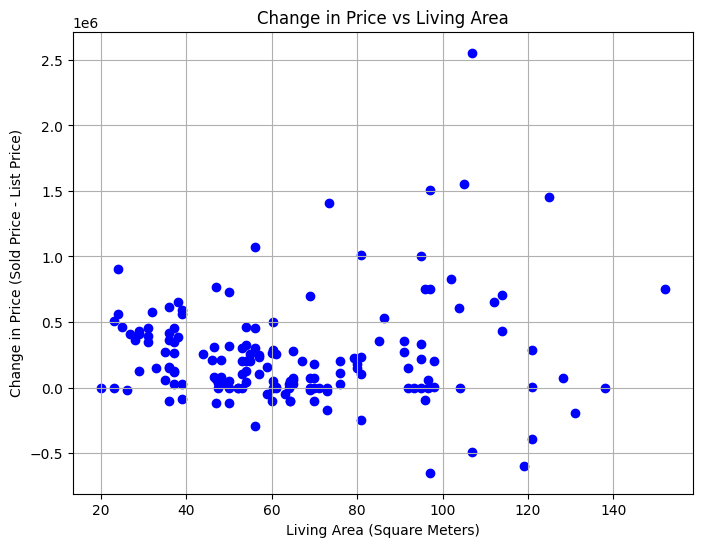

In [ ]:
living_area = []
price_change = []

# Loop through the data and only add valid entries
for entry in results:
    list_price = entry['List price']
    sold_price = entry['Sold price']
    
    # Only add data points if both list price and sold price are not NA values 
    if list_price is not None and sold_price is not None:
        living_area.append(entry['Square meters'])
        price_change.append(sold_price - list_price)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(living_area, price_change, color='blue', marker='o')

# Add labels and title
plt.xlabel('Living Area (Square Meters)')
plt.ylabel('Change in Price (Sold Price - List Price)')
plt.title('Change in Price vs Living Area')

# Show grid and plot
plt.grid(True)
plt.show()

Something interesting to look at would be how the price of houses and real estate variace depending on how many square meters the apartment is and how expensive the apartments or houses are depending on the square meters in Stockholm.

## Task 2.1

In [ ]:
def load_data_2(filename):
    '''
    Reading in the new csv file, not the same as the prevouis csv file 
    '''
    my_list_2 = []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            row = line.strip().split(';') # we are working with semi colons in this csv file 
            my_list_2.append(row)  
    return my_list_2

data_tk2 = load_data_2("2018_R_per_kommun.csv")

def extract_giltiga_for_stockholm(all_data2):
    '''
    Extracts 'RÖSTER GILTIGA' values for 'Stockholms län'
    '''
    if not all_data2:
        return []

    # Extract the header row
    header = all_data2[0]
    
    # getting the indices of 'LÄNSNAMN' and 'RÖSTER GILTIGA'
    try:
        länsnamn_index = header.index('LÄNSNAMN')
        giltiga_index = header.index('RÖSTER GILTIGA')
    except ValueError as e:
        raise ValueError("One or more columns not found in the header.") from e #precautions

    # Filter rows for 'Stockholms län' and extract 'RÖSTER GILTIGA'
    stockholm_giltiga = [
        row[giltiga_index]
        for row in all_data2[1:]  # Skip the header row
        if len(row) > giltiga_index and row[länsnamn_index] == 'Stockholms län'
    ]

    return stockholm_giltiga

def count_roster(giltiga_values):
    '''
    This function sums up all the values that are relevent
    '''
    try:
        return sum(int(value) for value in giltiga_values) # this sums up all votes
    except ValueError as l:
        raise ValueError("Non-numeric value encountered in 'RÖSTER GILTIGA'.") from l

giltiga_stockholm = extract_giltiga_for_stockholm(all_data2 = data_tk2)
total_giltiga = count_roster(giltiga_stockholm)
print("Antalet giltiga röster för 'Stockholms län':", total_giltiga)

Antalet giltiga röster för 'Stockholms län': 1426237


### Task 2.2

In [ ]:
def majority_votes(all_data3):
    if not all_data3:
        return None, None
    header = all_data3[0]
    try:
        kommun_index = header.index('KOMMUNNAMN') #looking for relevant municipal
        x_index = header.index('S') # looking for relevant political party 
    except ValueError as t:
        raise ValueError("Saknas data") from t # for NA values if it exisists 
    max_percentage = -1
    max_municipality = None

    for row in all_data3[1:]:
        if len(row) > x_index:
            try:
                municipality = row[kommun_index]
                percentage = float(row[x_index].replace(',', '.'))
                if percentage > max_percentage: # making easy calculations using keys to access dict 
                    max_percentage = percentage
                    max_municipality = municipality
            except ValueError:
                continue
    return max_municipality, max_percentage

support_municipality, support_percentage = majority_votes(all_data3 = data_tk2) 

if support_municipality:
    print(f"The municipality with the highest support for S is '{support_municipality}' with {support_percentage:.2f}%.")
else:
    print("No valid data found for Social Democratic Party support.") 



The municipality with the highest support for S is 'Munkfors' with 52.18%.


### Task 2.3

In [ ]:
# Integration of Top Participation Ranking 
def rank_highest_participation(all_data, top_n=3):
    if not all_data:
        return []

    # Extract the header row
    header = all_data[0]
    
    # Get the indices of 'KOMMUNNAMN' and 'VALDELTAGANDE'
    try:
        kommun_index = header.index('KOMMUNNAMN')
        valdeltagande_index = header.index('VALDELTAGANDE')
    except ValueError as e:
        raise ValueError("One or more required columns not found in the header.") from e

    # Extract participation values and municipalities
    participation_data = []
    for row in all_data[1:]:  # Skip the header 
        if len(row) > valdeltagande_index:
            try:
                municipality = row[kommun_index]
                participation = float(row[valdeltagande_index].replace(',', '.'))
                participation_data.append((municipality, participation))
            except ValueError:
                continue  # Skip rows with invalid participation values

    # Sort by participation in descending order
    sorted_participation = sorted(participation_data, key=lambda x: x[1], reverse=True)

    # Return the top N municipalities
    return sorted_participation[:top_n]

# Get the top 3 municipalities with highest participation
top_municipalities = rank_highest_participation(data_tk2, top_n=3)

# Display as a table 
print("\nTop 3 Municipalities by Participation:")
print(tabulate(top_municipalities, headers=["Municipality", "Participation (%)"], tablefmt="grid"))


Top 3 Municipalities by Participation:
+----------------+---------------------+
| Municipality   |   Participation (%) |
+================+=====================+
| Lomma          |               93.86 |
+----------------+---------------------+
| Habo           |               93.35 |
+----------------+---------------------+
| Vellinge       |               93.13 |
+----------------+---------------------+


## Task 3

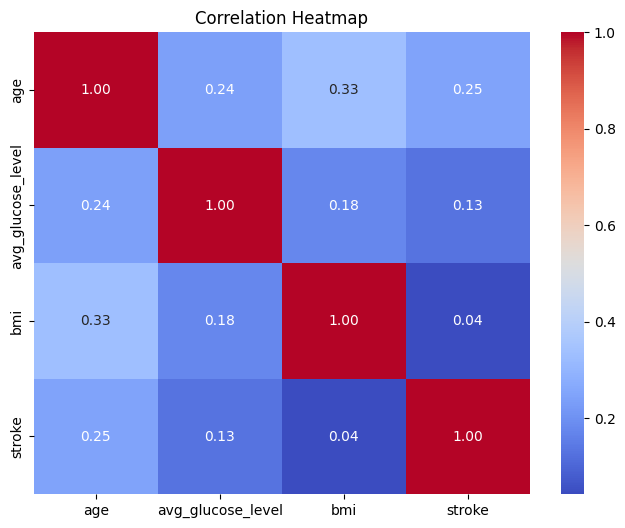

In [40]:
def load_data_3(filename):
    my_list_3 = []
    with open(filename, 'r', encoding='utf-8') as g:
        for line in g:
            row = line.strip().split(',')
            my_list_3.append(row)  
    return my_list_3



df_2 = load_data_3("stroke-data.csv")

columns = ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

# Convert the list of lists into a pandas DataFrame
data_frame = pd.DataFrame(df_2, columns=columns)

# Convert numeric columns to the appropriate data type
data_frame['age'] = pd.to_numeric(data_frame['age'], errors='coerce')
data_frame['avg_glucose_level'] = pd.to_numeric(data_frame['avg_glucose_level'], errors='coerce')
data_frame['bmi'] = pd.to_numeric(data_frame['bmi'], errors='coerce')
data_frame['stroke'] = pd.to_numeric(data_frame['stroke'], errors='coerce')

# Select only the relevant numeric columns for correlation
selected_columns = ['age', 'avg_glucose_level', 'bmi', 'stroke']

# Calculate the correlation matrix
correlation_matrix = data_frame[selected_columns].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()